In [1]:
import cv2
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(r"D:\Face Detection\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"D:\Face Detection\opencv\haarcascades\haarcascade_eye.xml")
side_face_cascade = cv2.CascadeClassifier(r"D:\Face Detection\model\opencv\haarcascades\haarcascade_profileface.xml")

## image cropping

In [3]:
# Function to detect and crop faces, handling sunglasses and side profiles
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Try to detect frontal faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    if len(faces) == 0:
        # If no frontal face is detected, try detecting side profile faces
        faces = side_face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # If no faces detected (frontal or side), return None
    if len(faces) == 0:
        return None
    
    # Process detected faces (either frontal or side profile)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # Try to detect eyes in the cropped face
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Crop the face if eyes are detected or if the face is likely with sunglasses/side profile
        if len(eyes) >= 1 or len(faces) >= 1:
            return roi_color  # Return the cropped face even if no eyes are detected (for sunglasses or side profiles)

    return None  # If no face is detected (which shouldn't happen here)


In [4]:
path_to_data=r"D:\Face Detection\model\datasets"
path_to_cr_data=r"D:\Face Detection\model\datasets\cropped"

In [5]:
img_dirs = []

# Get the list of player image directories
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
img_dirs

['D:\\Face Detection\\model\\datasets\\bumrah',
 'D:\\Face Detection\\model\\datasets\\hardik pandya',
 'D:\\Face Detection\\model\\datasets\\rohit sharma',
 'D:\\Face Detection\\model\\datasets\\sky',
 'D:\\Face Detection\\model\\datasets\\virat kohli']

In [7]:
# Create the cropped directory if it doesn't already exist
if not os.path.exists(path_to_cr_data):
    os.mkdir(path_to_cr_data)

In [8]:
cropped_image_dirs = []
players_file_names_dict = {}

# Loop through the player image directories
for img_dir in img_dirs:
    count = 1
    players_name = os.path.basename(img_dir)  # Use os.path.basename to extract the player's name
    print(players_name)
    
    # Initialize the player's entry in the dictionary if not already present
    players_file_names_dict[players_name] = players_file_names_dict.get(players_name, [])
    
    cropped_folder = os.path.join(path_to_cr_data, players_name)
    
    # Ensure the cropped folder exists only once
    if cropped_folder not in cropped_image_dirs:
        os.makedirs(cropped_folder, exist_ok=True)  # `exist_ok=True` ensures no error if folder already exists
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped images in folder:", cropped_folder)

    # Get the existing cropped image file names in the folder
    existing_cropped_images = set(os.listdir(cropped_folder))

    # Process only new images
    for entry in os.scandir(img_dir):
        cropped_file_name = players_name + str(count) + ".png"
        cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

        # Skip cropping if the image was already processed, even if it's deleted manually
        if cropped_file_name in existing_cropped_images:
            print(f"Image {cropped_file_name} already exists, skipping.")
            count += 1  # Increment the count for correct naming
            continue
        
        roi_color = get_cropped_image(entry.path)
        
        if roi_color is not None:
            # Save the new cropped image
            cv2.imwrite(cropped_file_path, roi_color)
            players_file_names_dict[players_name].append(cropped_file_path)
            print(f"Saved new cropped image: {cropped_file_name}")
            count += 1
        else:
            print(f"No face detected in {entry.path}")


bumrah
Generating cropped images in folder: D:\Face Detection\model\datasets\cropped\bumrah
No face detected in D:\Face Detection\model\datasets\bumrah\0127625bc44be98e9ed21b86385a2287.jpg
Saved new cropped image: bumrah1.png
Saved new cropped image: bumrah2.png
Saved new cropped image: bumrah3.png
Saved new cropped image: bumrah4.png
Saved new cropped image: bumrah5.png
Saved new cropped image: bumrah6.png
Saved new cropped image: bumrah7.png
Saved new cropped image: bumrah8.png
No face detected in D:\Face Detection\model\datasets\bumrah\1706959336333_Bumrah.webp
Saved new cropped image: bumrah9.png
No face detected in D:\Face Detection\model\datasets\bumrah\1720519928_lead.jpg
Saved new cropped image: bumrah10.png
Saved new cropped image: bumrah11.png
Saved new cropped image: bumrah12.png
Saved new cropped image: bumrah13.png
Saved new cropped image: bumrah14.png
Saved new cropped image: bumrah15.png
Saved new cropped image: bumrah16.png
Saved new cropped image: bumrah17.png
Saved ne

No face detected in D:\Face Detection\model\datasets\bumrah\images15.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images150.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images151.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images152.jpg
Saved new cropped image: bumrah101.png
No face detected in D:\Face Detection\model\datasets\bumrah\images154.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images155.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images156.jpg
Saved new cropped image: bumrah102.png
No face detected in D:\Face Detection\model\datasets\bumrah\images158.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images159.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images16.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images160.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images161.jpg
No face detected in D:\Face Detectio

No face detected in D:\Face Detection\model\datasets\bumrah\images270.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images271.jpg
Saved new cropped image: bumrah149.png
Saved new cropped image: bumrah150.png
No face detected in D:\Face Detection\model\datasets\bumrah\images274.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images275.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images276.jpg
Saved new cropped image: bumrah151.png
No face detected in D:\Face Detection\model\datasets\bumrah\images278.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images279.jpg
Saved new cropped image: bumrah152.png
No face detected in D:\Face Detection\model\datasets\bumrah\images280.jpg
Saved new cropped image: bumrah153.png
Saved new cropped image: bumrah154.png
No face detected in D:\Face Detection\model\datasets\bumrah\images283.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images284.jpg
No face detected in D:\Fac

No face detected in D:\Face Detection\model\datasets\bumrah\images392.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images393.jpg
Saved new cropped image: bumrah196.png
Saved new cropped image: bumrah197.png
Saved new cropped image: bumrah198.png
Saved new cropped image: bumrah199.png
No face detected in D:\Face Detection\model\datasets\bumrah\images398.jpg
Saved new cropped image: bumrah200.png
Saved new cropped image: bumrah201.png
No face detected in D:\Face Detection\model\datasets\bumrah\images40.jpg
Saved new cropped image: bumrah202.png
Saved new cropped image: bumrah203.png
No face detected in D:\Face Detection\model\datasets\bumrah\images402.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images403.jpg
Saved new cropped image: bumrah204.png
Saved new cropped image: bumrah205.png
No face detected in D:\Face Detection\model\datasets\bumrah\images406.jpg
Saved new cropped image: bumrah206.png
No face detected in D:\Face Detection\model\datasets\b

No face detected in D:\Face Detection\model\datasets\bumrah\images512.jpg
Saved new cropped image: bumrah244.png
No face detected in D:\Face Detection\model\datasets\bumrah\images514.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images515.jpg
Saved new cropped image: bumrah245.png
Saved new cropped image: bumrah246.png
No face detected in D:\Face Detection\model\datasets\bumrah\images518.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images519.jpg
Saved new cropped image: bumrah247.png
No face detected in D:\Face Detection\model\datasets\bumrah\images520.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images521.jpg
Saved new cropped image: bumrah248.png
Saved new cropped image: bumrah249.png
Saved new cropped image: bumrah250.png
No face detected in D:\Face Detection\model\datasets\bumrah\images525.jpg
Saved new cropped image: bumrah251.png
No face detected in D:\Face Detection\model\datasets\bumrah\images527.jpg
No face detected in D:

No face detected in D:\Face Detection\model\datasets\bumrah\images638.jpg
Saved new cropped image: bumrah300.png
Saved new cropped image: bumrah301.png
No face detected in D:\Face Detection\model\datasets\bumrah\images640.jpg
Saved new cropped image: bumrah302.png
Saved new cropped image: bumrah303.png
No face detected in D:\Face Detection\model\datasets\bumrah\images643.jpg
Saved new cropped image: bumrah304.png
No face detected in D:\Face Detection\model\datasets\bumrah\images645.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images646.jpg
Saved new cropped image: bumrah305.png
No face detected in D:\Face Detection\model\datasets\bumrah\images648.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images649.jpg
Saved new cropped image: bumrah306.png
Saved new cropped image: bumrah307.png
No face detected in D:\Face Detection\model\datasets\bumrah\images651.jpg
No face detected in D:\Face Detection\model\datasets\bumrah\images652.jpg
No face detected in D:

Saved new cropped image: bumrah352.png
Saved new cropped image: bumrah353.png
Saved new cropped image: bumrah354.png
Saved new cropped image: bumrah355.png
No face detected in D:\Face Detection\model\datasets\bumrah\It's India, the world champions 🇮🇳🇮🇳🇮🇳.jpeg
Saved new cropped image: bumrah356.png
No face detected in D:\Face Detection\model\datasets\bumrah\jasprit-bumrah-183035-16x9.jpg
Saved new cropped image: bumrah357.png
Saved new cropped image: bumrah358.png
No face detected in D:\Face Detection\model\datasets\bumrah\Jasprit-Bumrah-and-Surya-Kumar-Yadav.webp
No face detected in D:\Face Detection\model\datasets\bumrah\jasprit-bumrah-australia-india-cricket_7dab245c-c582-11e9-b964-dfb37bdfef35.jpg
Saved new cropped image: bumrah359.png
Saved new cropped image: bumrah360.png
No face detected in D:\Face Detection\model\datasets\bumrah\Jasprit-Bumrah.jpg
Saved new cropped image: bumrah361.png
Saved new cropped image: bumrah362.png
Saved new cropped image: bumrah363.png
Saved new croppe

Saved new cropped image: hardik pandya51.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\HD-wallpaper-hardik-pandya-showing-tattoo-face-closeup-cricketer-mumbai-indians-sports.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\HD-wallpaper-hardik-pandya-with-glasses-hardik-pandya-glasses-tattoo-pose-hoot.jpg
Saved new cropped image: hardik pandya52.png
Saved new cropped image: hardik pandya53.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\hq7202.jpg
Saved new cropped image: hardik pandya54.png
Saved new cropped image: hardik pandya55.png
Saved new cropped image: hardik pandya56.png
Saved new cropped image: hardik pandya57.png
Saved new cropped image: hardik pandya58.png
Saved new cropped image: hardik pandya59.png
Saved new cropped image: hardik pandya60.png
Saved new cropped image: hardik pandya61.png
Saved new cropped image: hardik pandya62.png
Saved new cropped image: hardik pandya63.png
Saved new cropped image: hard

No face detected in D:\Face Detection\model\datasets\hardik pandya\images176.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images177.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images178.jpg
Saved new cropped image: hardik pandya120.png
Saved new cropped image: hardik pandya121.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images180.jpg
Saved new cropped image: hardik pandya122.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images182.jpg
Saved new cropped image: hardik pandya123.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images184.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images185.jpg
Saved new cropped image: hardik pandya124.png
Saved new cropped image: hardik pandya125.png
Saved new cropped image: hardik pandya126.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images189.jpg
No face detected in D:\Face De

No face detected in D:\Face Detection\model\datasets\hardik pandya\images291.jpg
Saved new cropped image: hardik pandya176.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images293.jpg
Saved new cropped image: hardik pandya177.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images295.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images296.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images297.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images298.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images299.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images3.jpg
Saved new cropped image: hardik pandya178.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images300.jpg
Saved new cropped image: hardik pandya179.png
Saved new cropped image: hardik pandya180.png
No face detected in D:\Face Detection\model

No face detected in D:\Face Detection\model\datasets\hardik pandya\images405.jpg
Saved new cropped image: hardik pandya234.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images407.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images408.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images409.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images41.jpg
Saved new cropped image: hardik pandya235.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images411.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images412.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images413.jpg
Saved new cropped image: hardik pandya236.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images415.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images416.jpg
Saved new cropped image: hardik pandya237.png
No face

Saved new cropped image: hardik pandya295.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images522.jpg
Saved new cropped image: hardik pandya296.png
Saved new cropped image: hardik pandya297.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images525.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images526.jpg
Saved new cropped image: hardik pandya298.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images528.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images529.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images53.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images530.jpg
Saved new cropped image: hardik pandya299.png
Saved new cropped image: hardik pandya300.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images533.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images534.

No face detected in D:\Face Detection\model\datasets\hardik pandya\images635.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images636.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images637.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images638.jpg
Saved new cropped image: hardik pandya349.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images64.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images640.jpg
Saved new cropped image: hardik pandya350.png
No face detected in D:\Face Detection\model\datasets\hardik pandya\images642.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images643.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images644.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images645.jpg
No face detected in D:\Face Detection\model\datasets\hardik pandya\images646.jpg
Saved new cropped 

No face detected in D:\Face Detection\model\datasets\rohit sharma\8ef70-16609275646070-1920.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\9193f33bbb4928b43af13fcb9222166e.jpg
Saved new cropped image: rohit sharma13.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\a2b7e4f88677b6f57a518aa2ad73e07d.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\AF2bZyjNVJJGtEyZdVm2wdm1AtkiZeB1MCwFJpCYvbpmvydNgws64-c-mo.jpg
Saved new cropped image: rohit sharma14.png
Saved new cropped image: rohit sharma15.png
Saved new cropped image: rohit sharma16.png
Saved new cropped image: rohit sharma17.png
Saved new cropped image: rohit sharma18.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\download (2).jpeg
Saved new cropped image: rohit sharma19.png
Saved new cropped image: rohit sharma20.png
Saved new cropped image: rohit sharma21.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\Ezyx1XZVkAQDObY.jpg
Sav

Saved new cropped image: rohit sharma92.png
Saved new cropped image: rohit sharma93.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images164.jpg
Saved new cropped image: rohit sharma94.png
Saved new cropped image: rohit sharma95.png
Saved new cropped image: rohit sharma96.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images168.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images169.jpg
Saved new cropped image: rohit sharma97.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images170.jpg
Saved new cropped image: rohit sharma98.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images172.jpg
Saved new cropped image: rohit sharma99.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images174.jpg
Saved new cropped image: rohit sharma100.png
Saved new cropped image: rohit sharma101.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images177.jp

No face detected in D:\Face Detection\model\datasets\rohit sharma\images283.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images284.jpg
Saved new cropped image: rohit sharma159.png
Saved new cropped image: rohit sharma160.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images287.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images288.jpg
Saved new cropped image: rohit sharma161.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images29.jpg
Saved new cropped image: rohit sharma162.png
Saved new cropped image: rohit sharma163.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images292.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images293.jpg
Saved new cropped image: rohit sharma164.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images295.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images296.jpg
No face det

No face detected in D:\Face Detection\model\datasets\rohit sharma\images396.jpg
Saved new cropped image: rohit sharma205.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images398.jpg
Saved new cropped image: rohit sharma206.png
Saved new cropped image: rohit sharma207.png
Saved new cropped image: rohit sharma208.png
Saved new cropped image: rohit sharma209.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images401.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images402.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images403.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images404.jpg
Saved new cropped image: rohit sharma210.png
Saved new cropped image: rohit sharma211.png
Saved new cropped image: rohit sharma212.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images408.jpg
Saved new cropped image: rohit sharma213.png
Saved new cropped image: rohit shar

No face detected in D:\Face Detection\model\datasets\rohit sharma\images514.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images515.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images516.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images517.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images518.jpg
Saved new cropped image: rohit sharma268.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images52.jpg
Saved new cropped image: rohit sharma269.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images521.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images522.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images523.jpg
Saved new cropped image: rohit sharma270.png
Saved new cropped image: rohit sharma271.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images526.jpg
Saved new cropped ima

Saved new cropped image: rohit sharma316.png
Saved new cropped image: rohit sharma317.png
Saved new cropped image: rohit sharma318.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images63.jpg
Saved new cropped image: rohit sharma319.png
Saved new cropped image: rohit sharma320.png
Saved new cropped image: rohit sharma321.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images633.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images634.jpg
Saved new cropped image: rohit sharma322.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images636.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images637.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images638.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images639.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images64.jpg
Saved new cropped image: rohit sharma323.png
Sa

No face detected in D:\Face Detection\model\datasets\rohit sharma\images740.jpg
Saved new cropped image: rohit sharma369.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images742.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images743.jpg
Saved new cropped image: rohit sharma370.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images745.jpg
Saved new cropped image: rohit sharma371.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images747.jpg
Saved new cropped image: rohit sharma372.png
Saved new cropped image: rohit sharma373.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images75.jpg
Saved new cropped image: rohit sharma374.png
Saved new cropped image: rohit sharma375.png
No face detected in D:\Face Detection\model\datasets\rohit sharma\images77.jpg
No face detected in D:\Face Detection\model\datasets\rohit sharma\images78.jpg
Saved new cropped image: rohit sharma376.png
No 

Saved new cropped image: sky27.png
No face detected in D:\Face Detection\model\datasets\sky\FEATURE_Surya-Yadav.jpg
Saved new cropped image: sky28.png
Saved new cropped image: sky29.png
Saved new cropped image: sky30.png
Saved new cropped image: sky31.png
Saved new cropped image: sky32.png
Saved new cropped image: sky33.png
Saved new cropped image: sky34.png
Saved new cropped image: sky35.png
Saved new cropped image: sky36.png
Saved new cropped image: sky37.png
Saved new cropped image: sky38.png
Saved new cropped image: sky39.png
Saved new cropped image: sky40.png
Saved new cropped image: sky41.png
Saved new cropped image: sky42.png
Saved new cropped image: sky43.png
Saved new cropped image: sky44.png
Saved new cropped image: sky45.png
Saved new cropped image: sky46.png
No face detected in D:\Face Detection\model\datasets\sky\image21.jpeg
No face detected in D:\Face Detection\model\datasets\sky\image22.jpeg
Saved new cropped image: sky47.png
No face detected in D:\Face Detection\model\

Saved new cropped image: sky110.png
Saved new cropped image: sky111.png
No face detected in D:\Face Detection\model\datasets\sky\images20.jpg
Saved new cropped image: sky112.png
Saved new cropped image: sky113.png
Saved new cropped image: sky114.png
Saved new cropped image: sky115.png
Saved new cropped image: sky116.png
Saved new cropped image: sky117.png
No face detected in D:\Face Detection\model\datasets\sky\images206.jpg
Saved new cropped image: sky118.png
No face detected in D:\Face Detection\model\datasets\sky\images208.jpg
Saved new cropped image: sky119.png
Saved new cropped image: sky120.png
Saved new cropped image: sky121.png
No face detected in D:\Face Detection\model\datasets\sky\images211.jpg
No face detected in D:\Face Detection\model\datasets\sky\images212.jpg
No face detected in D:\Face Detection\model\datasets\sky\images213.jpg
No face detected in D:\Face Detection\model\datasets\sky\images214.jpg
Saved new cropped image: sky122.png
Saved new cropped image: sky123.png


Saved new cropped image: sky189.png
Saved new cropped image: sky190.png
Saved new cropped image: sky191.png
No face detected in D:\Face Detection\model\datasets\sky\images344.jpg
Saved new cropped image: sky192.png
No face detected in D:\Face Detection\model\datasets\sky\images346.jpg
Saved new cropped image: sky193.png
Saved new cropped image: sky194.png
No face detected in D:\Face Detection\model\datasets\sky\images349.jpg
No face detected in D:\Face Detection\model\datasets\sky\images35.jpg
No face detected in D:\Face Detection\model\datasets\sky\images350.jpg
No face detected in D:\Face Detection\model\datasets\sky\images351.jpg
No face detected in D:\Face Detection\model\datasets\sky\images352.jpg
Saved new cropped image: sky195.png
No face detected in D:\Face Detection\model\datasets\sky\images354.jpg
Saved new cropped image: sky196.png
No face detected in D:\Face Detection\model\datasets\sky\images356.jpg
No face detected in D:\Face Detection\model\datasets\sky\images357.jpg
No 

No face detected in D:\Face Detection\model\datasets\sky\images471.jpg
Saved new cropped image: sky242.png
No face detected in D:\Face Detection\model\datasets\sky\images473.jpg
No face detected in D:\Face Detection\model\datasets\sky\images474.jpg
No face detected in D:\Face Detection\model\datasets\sky\images475.jpg
No face detected in D:\Face Detection\model\datasets\sky\images476.jpg
Saved new cropped image: sky243.png
Saved new cropped image: sky244.png
Saved new cropped image: sky245.png
Saved new cropped image: sky246.png
No face detected in D:\Face Detection\model\datasets\sky\images480.jpg
No face detected in D:\Face Detection\model\datasets\sky\images481.jpg
Saved new cropped image: sky247.png
No face detected in D:\Face Detection\model\datasets\sky\images483.jpg
No face detected in D:\Face Detection\model\datasets\sky\images484.jpg
No face detected in D:\Face Detection\model\datasets\sky\images485.jpg
No face detected in D:\Face Detection\model\datasets\sky\images486.jpg
Sav

No face detected in D:\Face Detection\model\datasets\sky\images605.jpg
Saved new cropped image: sky306.png
Saved new cropped image: sky307.png
No face detected in D:\Face Detection\model\datasets\sky\images608.jpg
Saved new cropped image: sky308.png
Saved new cropped image: sky309.png
No face detected in D:\Face Detection\model\datasets\sky\images610.jpg
No face detected in D:\Face Detection\model\datasets\sky\images611.jpg
Saved new cropped image: sky310.png
Saved new cropped image: sky311.png
Saved new cropped image: sky312.png
Saved new cropped image: sky313.png
Saved new cropped image: sky314.png
No face detected in D:\Face Detection\model\datasets\sky\images617.jpg
No face detected in D:\Face Detection\model\datasets\sky\images618.jpg
No face detected in D:\Face Detection\model\datasets\sky\images619.jpg
Saved new cropped image: sky315.png
Saved new cropped image: sky316.png
No face detected in D:\Face Detection\model\datasets\sky\images621.jpg
Saved new cropped image: sky317.png


No face detected in D:\Face Detection\model\datasets\sky\images745.jpg
Saved new cropped image: sky382.png
Saved new cropped image: sky383.png
No face detected in D:\Face Detection\model\datasets\sky\images748.jpg
Saved new cropped image: sky384.png
Saved new cropped image: sky385.png
No face detected in D:\Face Detection\model\datasets\sky\images750.jpg
No face detected in D:\Face Detection\model\datasets\sky\images751.jpg
No face detected in D:\Face Detection\model\datasets\sky\images752.jpg
Saved new cropped image: sky386.png
Saved new cropped image: sky387.png
No face detected in D:\Face Detection\model\datasets\sky\images755.jpg
Saved new cropped image: sky388.png
No face detected in D:\Face Detection\model\datasets\sky\images757.jpg
Saved new cropped image: sky389.png
Saved new cropped image: sky390.png
Saved new cropped image: sky391.png
No face detected in D:\Face Detection\model\datasets\sky\images77.jpg
Saved new cropped image: sky392.png
No face detected in D:\Face Detection

Saved new cropped image: virat kohli18.png
No face detected in D:\Face Detection\model\datasets\virat kohli\AF2bZyjNVJJGtEyZdVm2wdm1AtkiZeB1MCwFJpCYvbpmvydNgws64-c-mo.jpg
Saved new cropped image: virat kohli19.png
Saved new cropped image: virat kohli20.png
Saved new cropped image: virat kohli21.png
Saved new cropped image: virat kohli22.png
Saved new cropped image: virat kohli23.png
No face detected in D:\Face Detection\model\datasets\virat kohli\cropped-Virat-Kohli-2024-04-be917e7071f4d1e9dd90a3c20d4ec024.jpg
Saved new cropped image: virat kohli24.png
Saved new cropped image: virat kohli25.png
No face detected in D:\Face Detection\model\datasets\virat kohli\download (2).jpeg
Saved new cropped image: virat kohli26.png
Saved new cropped image: virat kohli27.png
Saved new cropped image: virat kohli28.png
Saved new cropped image: virat kohli29.png
Saved new cropped image: virat kohli30.png
Saved new cropped image: virat kohli31.png
No face detected in D:\Face Detection\model\datasets\vira

No face detected in D:\Face Detection\model\datasets\virat kohli\images156.jpg
Saved new cropped image: virat kohli93.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images158.jpg
Saved new cropped image: virat kohli94.png
Saved new cropped image: virat kohli95.png
Saved new cropped image: virat kohli96.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images161.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images162.jpg
Saved new cropped image: virat kohli97.png
Saved new cropped image: virat kohli98.png
Saved new cropped image: virat kohli99.png
Saved new cropped image: virat kohli100.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images167.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images168.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images169.jpg
Saved new cropped image: virat kohli101.png
Saved new cropped image: virat kohli102.png
No face detect

No face detected in D:\Face Detection\model\datasets\virat kohli\images278.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images279.jpg
Saved new cropped image: virat kohli158.png
Saved new cropped image: virat kohli159.png
Saved new cropped image: virat kohli160.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images282.jpg
Saved new cropped image: virat kohli161.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images284.jpg
Saved new cropped image: virat kohli162.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images286.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images287.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images288.jpg
Saved new cropped image: virat kohli163.png
Saved new cropped image: virat kohli164.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images290.jpg
Saved new cropped image: virat kohli165.png
No face detected

Saved new cropped image: virat kohli239.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images406.jpg
Saved new cropped image: virat kohli240.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images408.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images409.jpg
Saved new cropped image: virat kohli241.png
Saved new cropped image: virat kohli242.png
Saved new cropped image: virat kohli243.png
Saved new cropped image: virat kohli244.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images413.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images414.jpg
Saved new cropped image: virat kohli245.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images416.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images417.jpg
Saved new cropped image: virat kohli246.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images419.jpg
Saved new croppe

No face detected in D:\Face Detection\model\datasets\virat kohli\images524.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images525.jpg
Saved new cropped image: virat kohli302.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images527.jpg
Saved new cropped image: virat kohli303.png
Saved new cropped image: virat kohli304.png
Saved new cropped image: virat kohli305.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images530.jpg
Saved new cropped image: virat kohli306.png
Saved new cropped image: virat kohli307.png
Saved new cropped image: virat kohli308.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images534.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images535.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images536.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images537.jpg
No face detected in D:\Face Detection\model\datasets\virat k

Saved new cropped image: virat kohli377.png
Saved new cropped image: virat kohli378.png
Saved new cropped image: virat kohli379.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images653.jpg
Saved new cropped image: virat kohli380.png
Saved new cropped image: virat kohli381.png
Saved new cropped image: virat kohli382.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images657.jpg
Saved new cropped image: virat kohli383.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images659.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images66.jpg
Saved new cropped image: virat kohli384.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images661.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images662.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images663.jpg
Saved new cropped image: virat kohli385.png
No face detected in D:\Face Detection\model\datasets

No face detected in D:\Face Detection\model\datasets\virat kohli\images86.jpg
Saved new cropped image: virat kohli443.png
Saved new cropped image: virat kohli444.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images89.jpg
Saved new cropped image: virat kohli445.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images90.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images91.jpg
No face detected in D:\Face Detection\model\datasets\virat kohli\images92.jpg
Saved new cropped image: virat kohli446.png
Saved new cropped image: virat kohli447.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images95.jpg
Saved new cropped image: virat kohli448.png
Saved new cropped image: virat kohli449.png
Saved new cropped image: virat kohli450.png
No face detected in D:\Face Detection\model\datasets\virat kohli\images99.jpg
Saved new cropped image: virat kohli451.png
Saved new cropped image: virat kohli452.png
No face detect

In [10]:
# after cropping u need to manually check and delete cropped images

### Face recognition

In [11]:
import os
import cv2
import face_recognition

known_face_encodings = []
known_face_names = []

# Loop through your cropped images
for player_name, file_paths in players_file_names_dict.items():
    for file_path in file_paths:
        if os.path.exists(file_path):
            img = face_recognition.load_image_file(file_path)

            # Get face encodings
            encodings = face_recognition.face_encodings(img)

            if len(encodings) > 0:
                face_encoding = encodings[0]  # Take the first face encoding
                known_face_encodings.append(face_encoding)
                known_face_names.append(player_name)
            else:
                # If no face encoding found, fallback to Haar Cascade
                # Convert to grayscale for Haar Cascade detection
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                # Detect frontal faces
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
                
                # If no frontal face, check for side profiles
                if len(faces) == 0:
                    faces = side_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

                # Check if any faces were detected
                if len(faces) > 0:
                    print(f"Face detected in {file_path}, but no encoding found. Consider adding this image for training.")
                else:
                    print(f"No face detected in {file_path}")

        else:
            print(f"File not found: {file_path}")

# Now `known_face_encodings` and `known_face_names` should have encodings for all valid images.


File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah2.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah3.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah6.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah7.png
Face detected in D:\Face Detection\model\datasets\cropped\bumrah\bumrah16.png, but no encoding found. Consider adding this image for training.
Face detected in D:\Face Detection\model\datasets\cropped\bumrah\bumrah19.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah21.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah23.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah26.png
Face detected in D:\Face Detection\model\datasets\cropped\bumrah\bumrah30.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\mo

File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah198.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah201.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah204.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah205.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah206.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah208.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah210.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah211.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah212.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah213.png
No face detected in D:\Face Detection\model\datasets\cropped\bumrah\bumrah214.png
File not found: D:\Face Detection\model\datasets\cropped\bumrah\bumrah223.png
File not found: D:\Face Detection\model\datasets\cropped\bum

Face detected in D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya42.png, but no encoding found. Consider adding this image for training.
Face detected in D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya44.png, but no encoding found. Consider adding this image for training.
Face detected in D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya57.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya59.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya61.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya64.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya75.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya81.png
Face detected in D:\Face Detection\model\datasets\cropped\hardik pandya\ha

File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya220.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya221.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya222.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya223.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya224.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya226.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya228.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya230.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya231.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pandya233.png
File not found: D:\Face Detection\model\datasets\cropped\hardik pandya\hardik pa

File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma32.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma40.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma42.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma44.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma48.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma50.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma53.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma55.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma57.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma60.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma62.png
File not found: D:\Fa

Face detected in D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma189.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma190.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma193.png
Face detected in D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma194.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma197.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma198.png
No face detected in D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma201.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma204.png
Face detected in D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma206.png, but no encoding found. Consider adding this image fo

No face detected in D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma363.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma364.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma366.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma367.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma368.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma369.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma374.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma377.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma385.png
File not found: D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma386.png
Face detected in D:\Face Detection\model\datasets\cropped\rohit sharma\rohit sharma389.png, but 

Face detected in D:\Face Detection\model\datasets\cropped\sky\sky180.png, but no encoding found. Consider adding this image for training.
Face detected in D:\Face Detection\model\datasets\cropped\sky\sky185.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\sky\sky188.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky190.png
Face detected in D:\Face Detection\model\datasets\cropped\sky\sky192.png, but no encoding found. Consider adding this image for training.
No face detected in D:\Face Detection\model\datasets\cropped\sky\sky195.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky197.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky200.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky202.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky203.png
Face detected in D:\Face Detection\model\datasets\cropped\sky\sky204.png, but 

File not found: D:\Face Detection\model\datasets\cropped\sky\sky389.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky392.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky393.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky394.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky395.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky397.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky399.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky401.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky402.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky404.png
Face detected in D:\Face Detection\model\datasets\cropped\sky\sky405.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\sky\sky406.png
File not found: D:\Face Detection\model\datasets\cropped\sky\sky412.pn

File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli186.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli187.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli188.png
Face detected in D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli189.png, but no encoding found. Consider adding this image for training.
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli200.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli204.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli205.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli207.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli208.png
Face detected in D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli210.png, but no encoding found. Consider adding this image fo

No face detected in D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli393.png
No face detected in D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli398.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli400.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli406.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli407.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli411.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli416.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli418.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli419.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli423.png
File not found: D:\Face Detection\model\datasets\cropped\virat kohli\virat kohli427.png
File not found: D:\Face 

In [12]:
import os
from sklearn.model_selection import train_test_split

# Assuming your dataset is organized with subfolders for each player
image_folder = r"D:\Face Detection\model\datasets\cropped"

# Create a dictionary to store image paths for each player
image_paths = []
labels = []

# Collect all image paths and corresponding player names (labels)
for player_name in os.listdir(image_folder):
    player_folder = os.path.join(image_folder, player_name)
    if os.path.isdir(player_folder):
        for img_file in os.listdir(player_folder):
            if img_file.endswith('.jpg') or img_file.endswith('.png'):
                image_paths.append(os.path.join(player_folder, img_file))
                labels.append(player_name)  # Label is the player's name

# Split into training and test sets (80% train, 20% test)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# You now have train_image_paths, test_image_paths, train_labels, and test_labels
print(f"Training set: {len(train_image_paths)} images")
print(f"Test set: {len(test_image_paths)} images")


Training set: 1017 images
Test set: 255 images


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# True labels (ground truth) from the test set
true_labels = test_labels  # These are the actual labels of the test images

# Predicted labels (from your face recognition system)
predicted_labels = []

# Loop through test images and predict their identities
for test_image_path in test_image_paths:
    # Run your face recognition on the test image
    img = face_recognition.load_image_file(test_image_path)
    face_encodings = face_recognition.face_encodings(img)
    
    if len(face_encodings) > 0:
        face_encoding = face_encodings[0]
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        
        # If below the threshold, consider it identified
        if face_distances[best_match_index] < 0.4:
            predicted_labels.append(known_face_names[best_match_index])
        else:
            predicted_labels.append('unidentified')
    else:
        predicted_labels.append('unidentified')

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Get a classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, zero_division=1))

# Optionally, print the confusion matrix for more insight
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


Accuracy: 88.63%

Classification Report:
               precision    recall  f1-score   support

       bumrah       1.00      0.90      0.95        39
hardik pandya       1.00      0.93      0.96        54
 rohit sharma       1.00      0.88      0.93        56
          sky       1.00      0.89      0.94        44
 unidentified       0.00      1.00      0.00         0
  virat kohli       1.00      0.85      0.92        62

     accuracy                           0.89       255
    macro avg       0.83      0.91      0.78       255
 weighted avg       1.00      0.89      0.94       255


Confusion Matrix:
[[35  0  0  0  4  0]
 [ 0 50  0  0  4  0]
 [ 0  0 49  0  7  0]
 [ 0  0  0 39  5  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  9 53]]


In [14]:
import face_recognition
import cv2
import numpy as np

def predict_multiple_faces(image_path, known_face_encodings, known_face_names, threshold=0.4):
    # Load the image
    img = face_recognition.load_image_file(image_path)
    
    # Find face locations and encodings in the image
    face_locations = face_recognition.face_locations(img)
    face_encodings = face_recognition.face_encodings(img, face_locations)

    # Convert image to BGR format for OpenCV
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Initialize a list to store predicted names
    predicted_names = []

    # Loop through detected faces and match them with known faces
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compute distances between the face encoding and known faces
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)

        # Determine if the face is identified or unidentified
        if face_distances[best_match_index] < threshold:
            name = known_face_names[best_match_index]
            color = (0, 255, 0)  # Green for identified
        else:
            name = "unidentified"
            color = (0, 0, 255)  # Red for unidentified
        
        # Draw rectangle around the face and put the label
        cv2.rectangle(img_bgr, (left, top), (right, bottom), color, 2)
        cv2.putText(img_bgr, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Add the predicted name to the list
        predicted_names.append(name)

    # Return the processed image and predicted names
    return img_bgr, predicted_names


Predicted names: ['unidentified', 'rohit sharma', 'unidentified', 'unidentified', 'unidentified', 'hardik pandya', 'unidentified', 'unidentified', 'unidentified', 'unidentified', 'unidentified', 'bumrah', 'unidentified', 'sky', 'unidentified', 'virat kohli', 'unidentified', 'unidentified', 'unidentified']


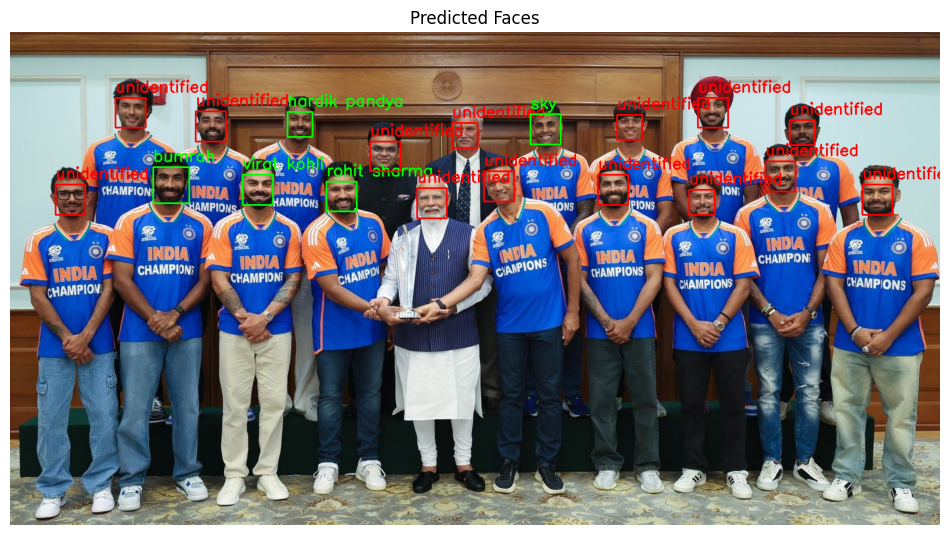

In [15]:
import cv2
import matplotlib.pyplot as plt

# Image path to test
test_image_path = r"D:\Face Detection\model\test_images\am-receives-roaring-homecoming-after-winning-ICC-T20-World-Cup-meets-PM-Modi.jpg"

# Call the prediction function
processed_image, predicted_names = predict_multiple_faces(test_image_path, known_face_encodings, known_face_names)

# Show the results
print("Predicted names:", predicted_names)

# Convert the processed image from BGR (OpenCV format) to RGB (matplotlib format)
processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

# Adjust the figure size to make it larger for better display in Jupyter
plt.figure(figsize=(12, 12))  # You can change (12, 12) to any size that works for you

# Plot the image using matplotlib
plt.imshow(processed_image_rgb)
plt.axis('off')  # Hide axes
plt.title('Predicted Faces')

# Display the image with predicted names
plt.show()


In [16]:
import pickle

# Assuming known_face_encodings and known_face_names are defined
data_to_pickle = (known_face_encodings, known_face_names)

# Pickle the data
with open('face_data.pkl', 'wb') as f:
    pickle.dump(data_to_pickle, f)


In [17]:
import pickle

# Load the data back when starting your web app
with open('face_data.pkl', 'rb') as f:
    known_face_encodings, known_face_names = pickle.load(f)
